# Support Vector Machines Project 


## The Data

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by Sir Ronald Fisher in the 1936 as an example of discriminant analysis. 

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor), so 150 total samples. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.


The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:

    Iris-setosa (n=50)
    Iris-versicolor (n=50)
    Iris-virginica (n=50)

The four features of the Iris dataset:

    sepal length in cm
    sepal width in cm
    petal length in cm
    petal width in cm

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get the data


In [2]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Exploratory Data Analysis


**Pairplot of the data set**

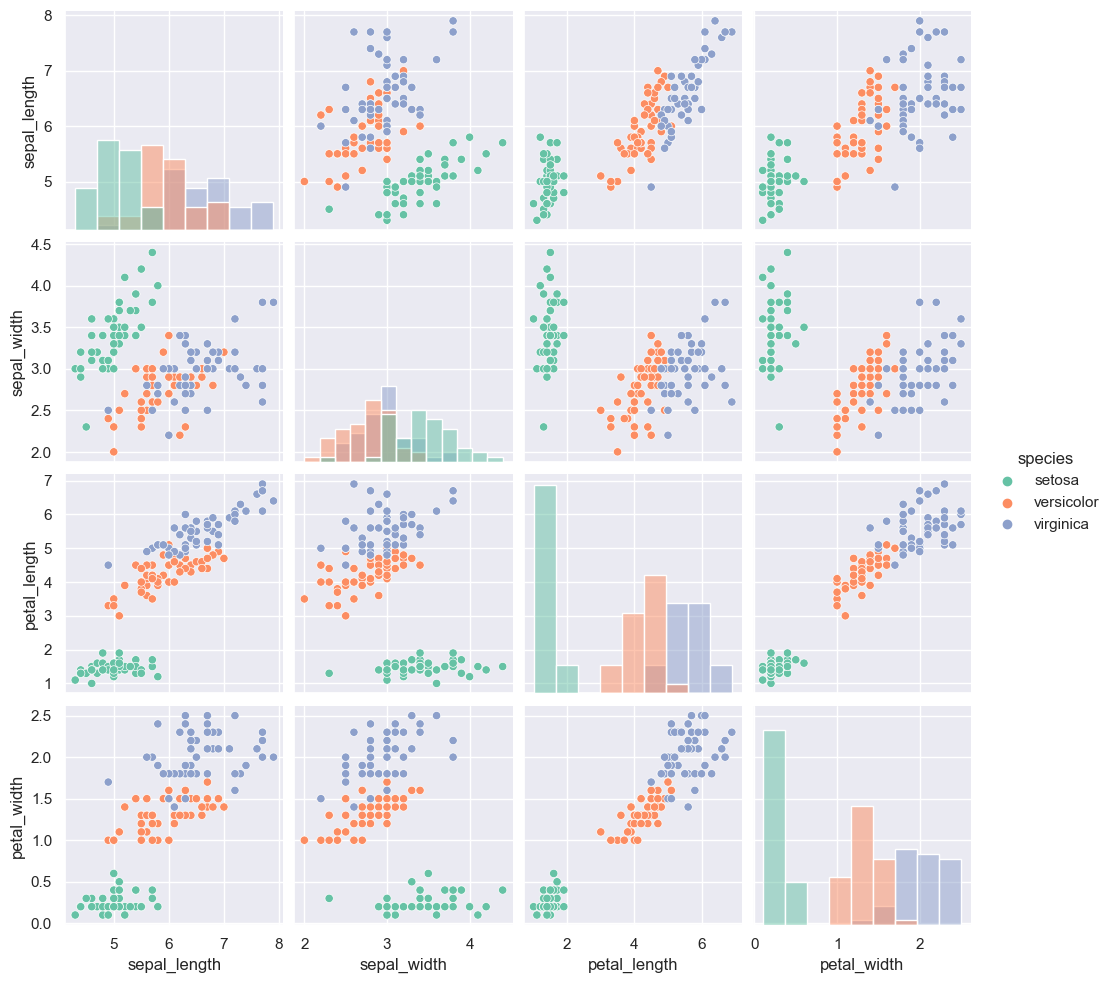

In [3]:
sns.set_theme(style='darkgrid')

sns.pairplot(iris, hue='species', diag_kind='hist', palette='Set2')

**Kde plot of sepal_length versus sepal width for setosa species of flower**

<AxesSubplot: xlabel='sepal_width', ylabel='sepal_length'>

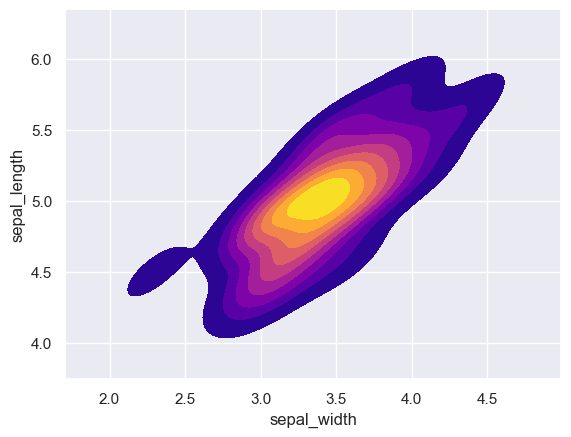

In [4]:
sns.kdeplot(data=iris[iris['species']=='setosa'], x='sepal_width', y='sepal_length', fill=True, cmap='plasma')

## Splitting the data


In [5]:
X = iris.drop('species', axis=1)
y = iris['species']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Fitting a Support Vector Machine Classifier


In [8]:
from sklearn.svm import SVC

In [9]:
model = SVC()

In [10]:
model.fit(X_train, y_train)

SVC()

## Model Evaluation

In [11]:
preds = model.predict(X_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

**Creating a confusion matrix and a classification report**

In [13]:
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



**Predictions are perfect, but for the sake of practice:**

## Gridsearch Practice

In [14]:
from sklearn.model_selection import GridSearchCV

**Creating a dictionary called param_grid and fill out some parameters for C and gamma.**

In [15]:
param_grid = {'C':[.1, 1, 10, 100], 'gamma':['scale', 'auto', 1, .1, .01, .001]}

**Creating a GridSearchCV object and fit it to the training data.**

In [16]:
grid = GridSearchCV(SVC(), param_grid, verbose=4)

In [17]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END ................C=0.1, gamma=scale;, score=0.905 total time=   0.0s
[CV 2/5] END ................C=0.1, gamma=scale;, score=0.905 total time=   0.0s
[CV 3/5] END ................C=0.1, gamma=scale;, score=0.905 total time=   0.0s
[CV 4/5] END ................C=0.1, gamma=scale;, score=1.000 total time=   0.0s
[CV 5/5] END ................C=0.1, gamma=scale;, score=0.857 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=auto;, score=1.000 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=auto;, score=0.857 total time=   0.0s
[CV 3/5] END .................C=0.1, gamma=auto;, score=0.810 total time=   0.0s
[CV 4/5] END .................C=0.1, gamma=auto;, score=1.000 total time=   0.0s
[CV 5/5] END .................C=0.1, gamma=auto;, score=0.857 total time=   0.0s
[CV 1/5] END ....................C=0.1, gamma=1;, score=1.000 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001]},
             verbose=4)

In [18]:
grid.best_params_

{'C': 100, 'gamma': 0.01}

## Predictions and evaluation with new parameters

In [19]:
grid_preds = grid.predict(X_test)

In [20]:
print(confusion_matrix(y_test, grid_preds))
print('\n')
print(classification_report(y_test, grid_preds))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

